In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
im=cv2.imread('/home/archna/Downloads/picture_for_hostel_allotment.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(400, 400, 3)


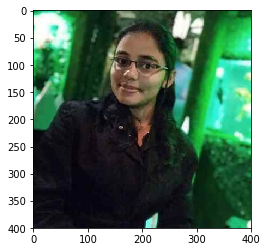

In [5]:
plt.imshow(im)
plt.show()

In [6]:
#Flatten each  of channel of the image

In [7]:
all_pixels=im.reshape((-1,3)) # or((-1,3))
print(all_pixels.shape)

(160000, 3)


In [8]:
from sklearn.cluster import KMeans

In [18]:
dominent_color=5
km=KMeans(n_clusters=dominent_color)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
centers=km.cluster_centers_

In [20]:
centers=np.array(centers,dtype='uint8')

In [21]:
print(centers)

[[131 117  91]
 [ 17  25  22]
 [ 56 210 142]
 [199 236 218]
 [ 33 103  50]]


# plot what all colors are these?

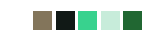

In [22]:
i=1
plt.figure(0,figsize=(8,2))


colors=[]
for each_col in centers:
    plt.subplot(1,20,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    
    
    plt.imshow(a)
plt.show()
    

# Segmenting Our original image

In [23]:
new_image=np.zeros((400*400,3),dtype='uint8')



print(new_image.shape)


(160000, 3)


In [24]:
colors

[array([131, 117,  91], dtype=uint8),
 array([17, 25, 22], dtype=uint8),
 array([ 56, 210, 142], dtype=uint8),
 array([199, 236, 218], dtype=uint8),
 array([ 33, 103,  50], dtype=uint8)]

In [25]:
km.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

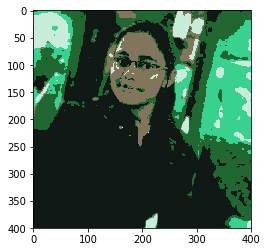

In [26]:
for ix in range(new_image.shape[0]):
    new_image[ix]=colors[km.labels_[ix]]
new_image=new_image.reshape((original_shape))

plt.imshow(new_image)
plt.show()